In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [5]:
random_state = 2020


train_df = pd.read_csv('../data/final/train_imputed.csv')
val_df = pd.read_csv('../data/final/val_imputed.csv')
test_df = pd.read_csv('../data/final/test_imputed.csv')

X_train = train_df.drop(columns=['patientunitstayid', 'aki_label']).values
print(X_train.shape)
y_train = train_df.aki_label.values

X_val = val_df.drop(columns=['patientunitstayid', 'aki_label']).values
print(X_val.shape)
y_val = val_df.aki_label.values

X_test = test_df.drop(columns=['patientunitstayid', 'aki_label']).values
print(X_test.shape)
y_test = test_df.aki_label.values

(57474, 85)
(14303, 85)
(10646, 85)


In [20]:
import random
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score

max_depths = [80, 90, 100, 110]
n_estimatorss = [100, 200, 300, 1000]

tested_params = {'max_depth': [],
    'n_estimators': [],
      'roc':[],
         'avepscore':[]   }

for md in max_depths:
    for ne in n_estimatorss:
        rf = RandomForestClassifier(random_state=2020, class_weight='balanced', max_depth=md,\
                                   n_estimators=ne)
        tested_params['max_depth'].append(md)
        tested_params['n_estimators'].append(ne)
        rf.fit(X_train, y_train)
        print('training complete')
        y_pred = rf.predict_proba(X_val)[:,1]
        roc = roc_auc_score(y_val, y_pred)
        avepscore =  average_precision_score(y_val, y_pred)
        tested_params['roc'].append(roc)
        tested_params['avepscore'].append(avepscore)

training complete
training complete
training complete
training complete
training complete
training complete
training complete
training complete
training complete


KeyboardInterrupt: 

In [24]:
pd.DataFrame(tested_params)

,max_depth,n_estimators,roc,avepscore
0,80,100,0.833180,0.130940
1,80,200,0.846562,0.132287
2,80,300,0.850003,0.136507
3,80,1000,0.855922,0.147447
4,90,100,0.833180,0.130940
5,90,200,0.846562,0.132287
6,90,300,0.850019,0.136578
7,90,1000,0.855926,0.147364
8,100,100,0.833180,0.130940


In [23]:
tested_params['max_depth'] = [80, 80, 80, 80, 90, 90, 90, 90, 100]
tested_params['n_estimators'] = [100, 200, 300, 1000, 100, 200, 300, 1000, 100]

In [26]:
X_train_val = np.vstack((X_train, X_val))
print(X_train_val.shape)

(71777, 85)


In [28]:
y_train_val = np.concatenate((y_train, y_val), axis=0)
print(y_train_val.shape)

(71777,)


In [29]:
rf = RandomForestClassifier(random_state=2020, class_weight='balanced', max_depth=80,\
                                   n_estimators=1000)
rf.fit(X_train_val, y_train_val)

RandomForestClassifier(class_weight='balanced', max_depth=80, n_estimators=1000,
                       random_state=2020)

[[10399     1]
 [  243     3]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     10400
           1       0.75      0.01      0.02       246

    accuracy                           0.98     10646
   macro avg       0.86      0.51      0.51     10646
weighted avg       0.97      0.98      0.97     10646



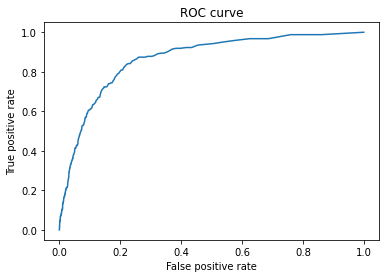

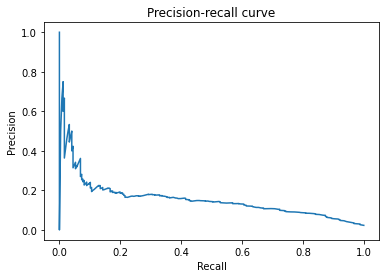

In [38]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

y_score = rf.predict(X_test)
y_pred = rf.predict_proba(X_test)[:, 1]
print(confusion_matrix(y_test, y_score))
print(classification_report(y_test, y_score))
fpr, tpr, auc_th = roc_curve(y_test, y_pred)
precision, recall, pr_th = precision_recall_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.show()

In [63]:
np.where(recall>0.5)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),)

In [64]:
pr_th[111]

0.094

In [36]:
np.where(tpr>0.8)

(array([236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248,
        249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261,
        262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274,
        275, 276, 277, 278, 279, 280, 281, 282, 283, 284]),)

In [37]:
auc_th[236]

0.038

In [39]:
fpr[236]

0.19865384615384615

In [49]:
feat_imp = pd.DataFrame({'feature': train_df.drop(columns=['patientunitstayid', 'aki_label']).columns , 'importance': rf.feature_importances_})
feat_imp.sort_values(by='importance', ascending=False, inplace=True)
feat_imp

,feature,importance
36,max_result_creatinine,0.131909
21,min_result_creatinine,0.074760
26,max_result_BUN,0.054793
51,delta_result_creatinine,0.048979
11,min_result_BUN,0.037303
...,...,...
75,organ_system_Genitourinary,0.000356
60,ethnicity_Asian,0.000317
63,ethnicity_Native American,0.000259
76,organ_system_Hematology,0.000098


Text(0.5, 1.0, 'Feature importance')

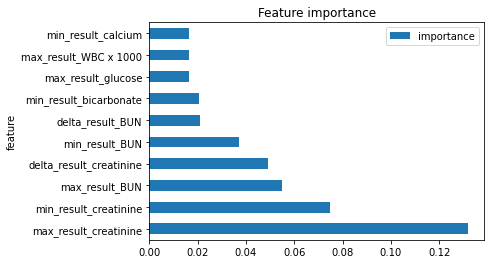

In [60]:
feat_imp = feat_imp[feat_imp['feature']!='Unnamed: 0']
feat_imp[:10].plot.barh(y='importance', x='feature')
plt.title('Feature importance')

In [72]:
import seabors as sns
sns.pairplot(train_df['min_heartrate', 'max_heartrate', 'mean_heartrate', 'min_respiration',\
       'max_respiration', 'mean_respiration', 'min_result_BUN'], train_df[['min_heartrate', 'max_heartrate', 'mean_heartrate', 'min_respiration',\
       'max_respiration', 'mean_respiration', 'min_result_BUN'], kind='scatter', diag_kind='auto')

SyntaxError: invalid syntax (<ipython-input-72-0b3a9063dbbb>, line 4)

In [66]:
train_df.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['Unnamed: 0', 'age', 'min_sao2', 'max_sao2', 'mean_sao2',
       'min_heartrate', 'max_heartrate', 'mean_heartrate', 'min_respiration',
       'max_respiration', 'mean_respiration', 'min_result_BUN',
       'min_result_Hct', 'min_result_Hgb', 'min_result_MCHC', 'min_result_MCV',
       'min_result_RBC', 'min_result_WBC x 1000', 'min_result_bicarbonate',
       'min_result_calcium', 'min_result_chloride', 'min_result_creatinine',
       'min_result_glucose', 'min_result_platelets x 1000',
       'min_result_potassium', 'min_result_sodium', 'max_result_BUN',
       'max_result_Hct', 'max_result_Hgb', 'max_result_MCHC', 'max_result_MCV',
       'max_result_RBC', 'max_result_WBC x 1000', 'max_result_bicarbonate',
       'max_result_calcium', 'max_result_chloride', 'max_result_creatinine',
       'max_result_glucose', 'max_result_platelets x 1000',
       'max_result_potassium', 'max_result_sodium', 'delta_result_BUN',
       'delta_result_Hct', 

<ipython-input-74-6c667f7fffbe>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  creatinine_lab = train_df.groupby('aki_label')['min_result_creatinine', 'max_result_creatinine'].plot()


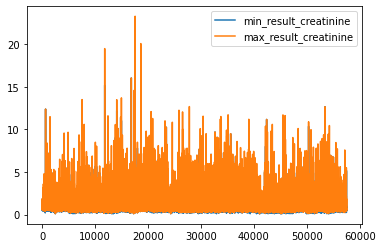

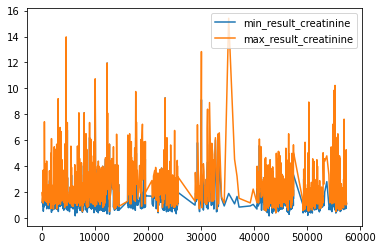

In [74]:
creatinine_lab = train_df.groupby('aki_label')['min_result_creatinine', 'max_result_creatinine'].plot()

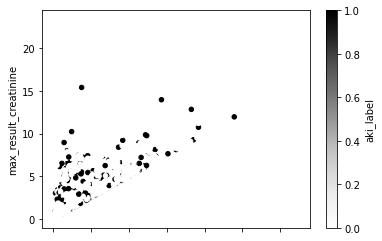

In [75]:
train_df.plot.scatter('min_result_creatinine', 'max_result_creatinine', c='aki_label')

Text(0.5, 1.0, 'Min and max creatinine levels for both classes')

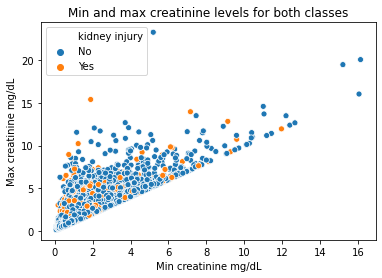

In [81]:
import seaborn as sns
train_df.loc[train_df['aki_label']==0, 'kidney injury' ]= 'No'
train_df.loc[train_df['aki_label']==1, 'kidney injury' ]= 'Yes'

sns.scatterplot(x='min_result_creatinine', y='max_result_creatinine', hue='kidney injury', data=train_df)
plt.xlabel('Min creatinine mg/dL')
plt.ylabel('Max creatinine mg/dL')
plt.title('Min and max creatinine levels for both classes')

Text(0.5, 1.0, 'Max lab measurements for BUN and WBC for both classes')

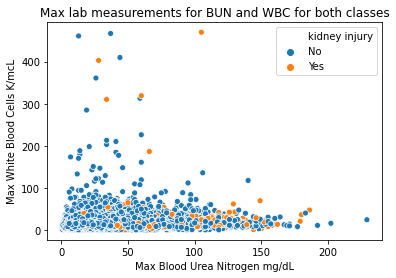

In [80]:
import seaborn as sns

sns.scatterplot(x='max_result_BUN', y='max_result_WBC x 1000', hue='kidney injury', data=train_df)
plt.xlabel('Max Blood Urea Nitrogen mg/dL')
plt.ylabel('Max White Blood Cells K/mcL')
plt.title('Max lab measurements for BUN and WBC for both classes')